## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv'] 

In [4]:
synth_tables = []

for fp in synthesis_files:
    data= pd.read_csv(fp)
    synth_tables.append(data)

synth_table = pd.concat(synth_tables, axis = 0)

In [7]:
for table, synth_file in zip(synth_tables, synthesis_files):
    for val in table['uuid'].to_list():
        if 'd298bae0-5f86-4a29-b399-111644195748' == val:
            print(synth_file)

/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv


In [6]:
table

'Unnamed: 0.1'

In [6]:
synth_table = synth_table.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well'], axis = 1)

In [7]:
synth_table = synth_table.set_index('uuid')

## Get volume fractions

In [8]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [9]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [10]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [11]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588
8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118
130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262
f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21d4f4ac-db02-41f9-b1ad-00c2e61fc894,52.700002,28.135001,45.475003,1573.689993,0.720046,8.343911,0.010415,476.0,1224.0,E8,1700.0,0.031000,0.016550,0.026750,0.925700
3f24b844-1e01-4b2d-976d-9083d8131fe3,25.493084,13.312871,38.006498,1623.187548,1.488499,4.036281,0.005064,0.0,1700.0,F1,1700.0,0.014996,0.007831,0.022357,0.954816
1e26acd9-0b68-4941-96c0-f56653643d27,23.959985,21.881726,28.995437,1625.162853,1.583742,3.793548,0.004764,0.0,1700.0,F2,1700.0,0.014094,0.012872,0.017056,0.955978


In [12]:
synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [16]:
distance_results = pd.read_csv('../2024_11_11_OptimizationRound2/amplitude_phase_results_afterOptimRound2_11_13_24.csv')

In [17]:
distance_results = distance_results.set_index('uuid')

In [18]:
distance_results

,Unnamed: 0.1,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,processes_status
uuid,,,,,,
770a433d-0480-4cee-bf12-ce066c24db55,0,0.0,1.079610,4.074514e-01,1.487061,success
fed3ab35-04e9-4916-8527-8627191a3bdc,1,1.0,0.474113,1.775399e-01,0.651653,success
4ab46dcc-3395-4e7b-bb87-52e805e12abb,2,2.0,0.979413,5.400224e-01,1.519435,success
23850c30-c572-41ad-abf0-7e1bd4fa7397,3,3.0,NaN,NaN,NaN,failed
96ef6012-d812-4975-8b77-8ed7e78669fb,4,4.0,1.003274,5.202165e-01,1.523491,success
...,...,...,...,...,...,...
d027691b-6a39-43f7-8527-56dd93433485,15,NaN,NaN,2.580957e-08,NaN,success
1e26acd9-0b68-4941-96c0-f56653643d27,16,NaN,1.428278,5.194059e-01,1.947684,success
d298bae0-5f86-4a29-b399-111644195748,17,NaN,1.054124,5.120969e-01,1.566220,success


In [19]:
distance_list = []
experiment_status = []

for uuid_val in synth_table.index:
    #print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        experiment_status.append('complete')
        


In [20]:
synth_table['ap_distance'] = distance_list
synth_table['experiment_status'] = experiment_status

In [21]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588,NaN,incomplete
8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118,NaN,incomplete
130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765,0.904308,complete
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262,1.467659,complete
f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822,1.498439,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21d4f4ac-db02-41f9-b1ad-00c2e61fc894,52.700002,28.135001,45.475003,1573.689993,0.720046,8.343911,0.010415,476.0,1224.0,E8,1700.0,0.031000,0.016550,0.026750,0.925700,1.108877,complete
3f24b844-1e01-4b2d-976d-9083d8131fe3,25.493084,13.312871,38.006498,1623.187548,1.488499,4.036281,0.005064,0.0,1700.0,F1,1700.0,0.014996,0.007831,0.022357,0.954816,NaN,complete
1e26acd9-0b68-4941-96c0-f56653643d27,23.959985,21.881726,28.995437,1625.162853,1.583742,3.793548,0.004764,0.0,1700.0,F2,1700.0,0.014094,0.012872,0.017056,0.955978,1.947684,complete


In [26]:
synth_table.to_csv('synth_table_ap_distance_11_14_24.csv')

In [23]:
synth_table['rank'] = rank = synth_table['ap_distance'].rank()

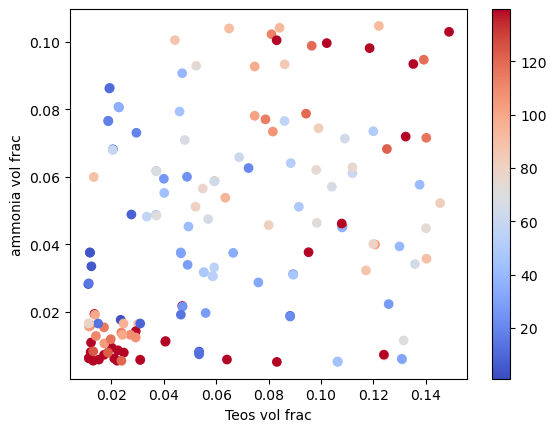

In [24]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['ammonia_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
cbar = fig.colorbar(sc, ax = ax)

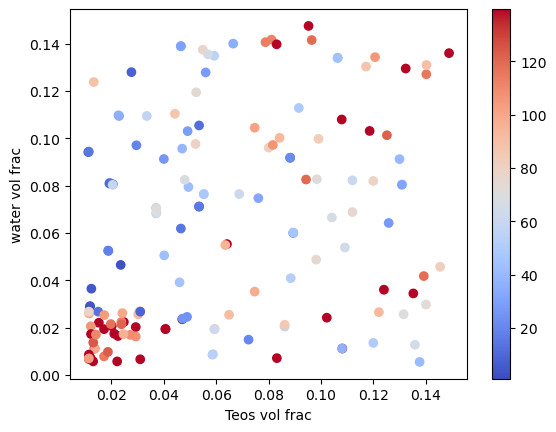

In [25]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['water_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('water vol frac')
cbar = fig.colorbar(sc, ax = ax)